In [84]:
#importing libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier



In [4]:
iris_dataset= pd.read_csv("Iris.csv")  
iris_dataset.head()                                        

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#droping  id becuase it is no use to us
iris_dataset.drop("Id",axis=1,inplace=True) 

In [7]:
#describes are data 
iris_dataset.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#gives information about the columns
iris_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: xlabel='Species', ylabel='count'>

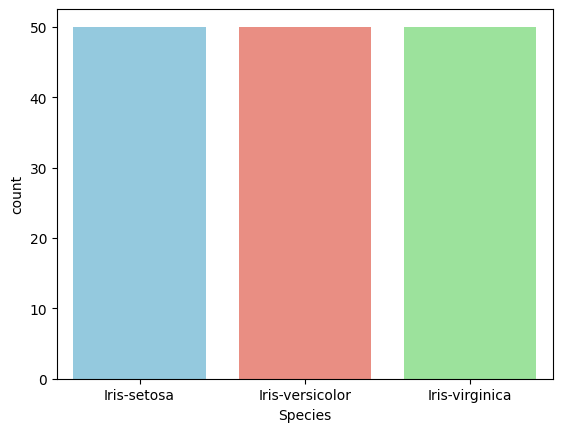

In [15]:
#Data Visualization

# Print value counts for Species
print(iris_dataset["Species"].value_counts())
custom_palette = {"Iris-setosa": "skyblue", "Iris-versicolor": "salmon", "Iris-virginica": "lightgreen"}
sns.countplot(x=iris_dataset["Species"], hue=iris_dataset["Species"], palette=custom_palette, legend=False)


Text(0.5, 0, 'Columns')

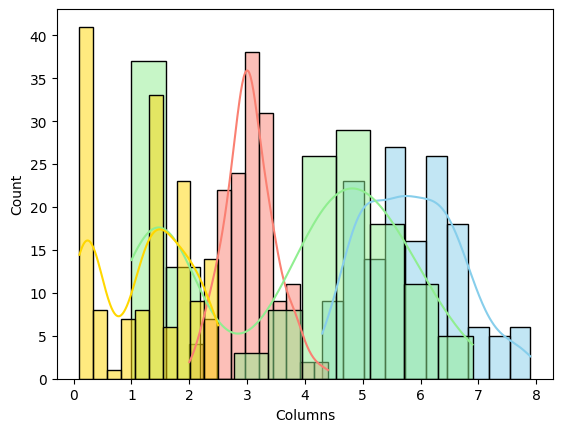

In [22]:
ax = sns.histplot(data=iris_dataset, x="SepalLengthCm", bins=10, kde=True, color='skyblue')
ax = sns.histplot(data=iris_dataset, x="SepalWidthCm", bins=10, kde=True, color='salmon')
ax = sns.histplot(data=iris_dataset, x="PetalLengthCm", bins=10, kde=True, color='lightgreen')
ax = sns.histplot(data=iris_dataset, x="PetalWidthCm", bins=10, kde=True, color='gold')

ax.set_xlabel("Columns")

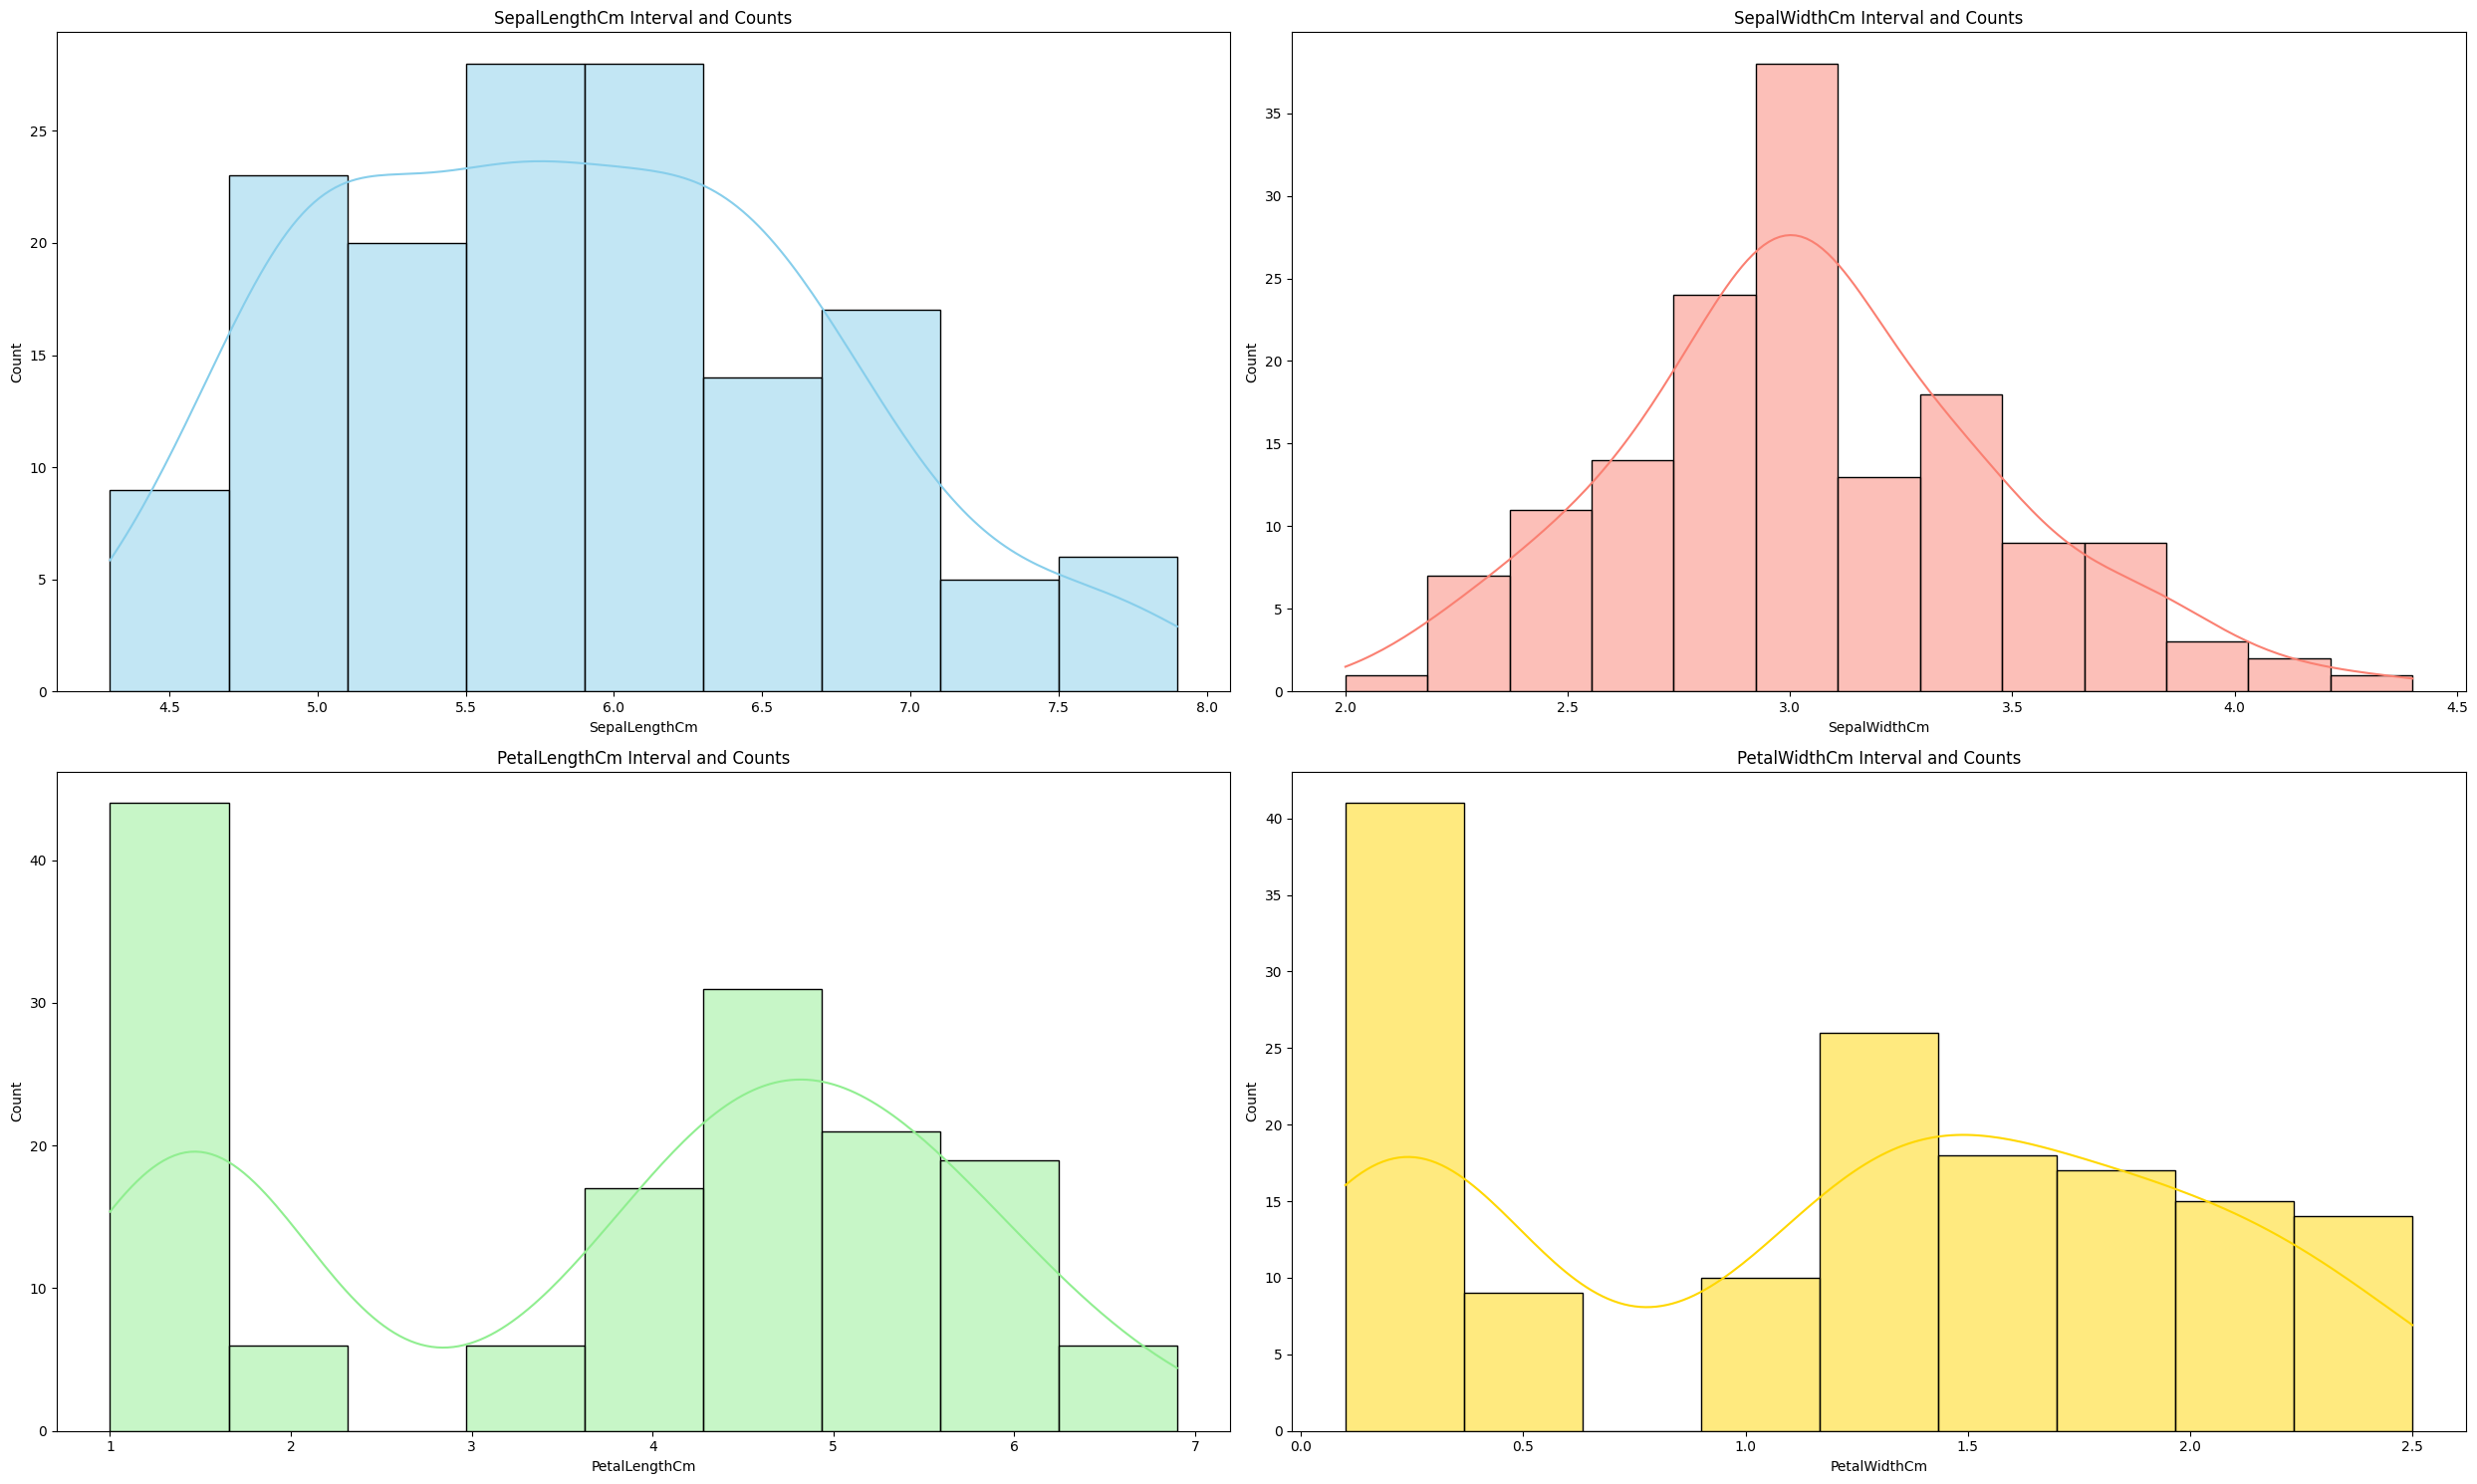

In [24]:

plt.figure(figsize=(25, 15))

# Create subplot for SepalLengthCm
plt.subplot(2, 2, 1)
sns.histplot(data=iris_dataset, x="SepalLengthCm", kde=True, color='skyblue').set_title('SepalLengthCm Interval and Counts')

# Create subplot for SepalWidthCm
plt.subplot(2, 2, 2)
sns.histplot(data=iris_dataset, x="SepalWidthCm", kde=True, color='salmon').set_title('SepalWidthCm Interval and Counts')

# Create subplot for PetalLengthCm
plt.subplot(2, 2, 3)
sns.histplot(data=iris_dataset, x="PetalLengthCm", kde=True, color='lightgreen').set_title('PetalLengthCm Interval and Counts')

# Create subplot for PetalWidthCm
plt.subplot(2, 2, 4)
sns.histplot(data=iris_dataset, x="PetalWidthCm", kde=True, color='gold').set_title('PetalWidthCm Interval and Counts')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

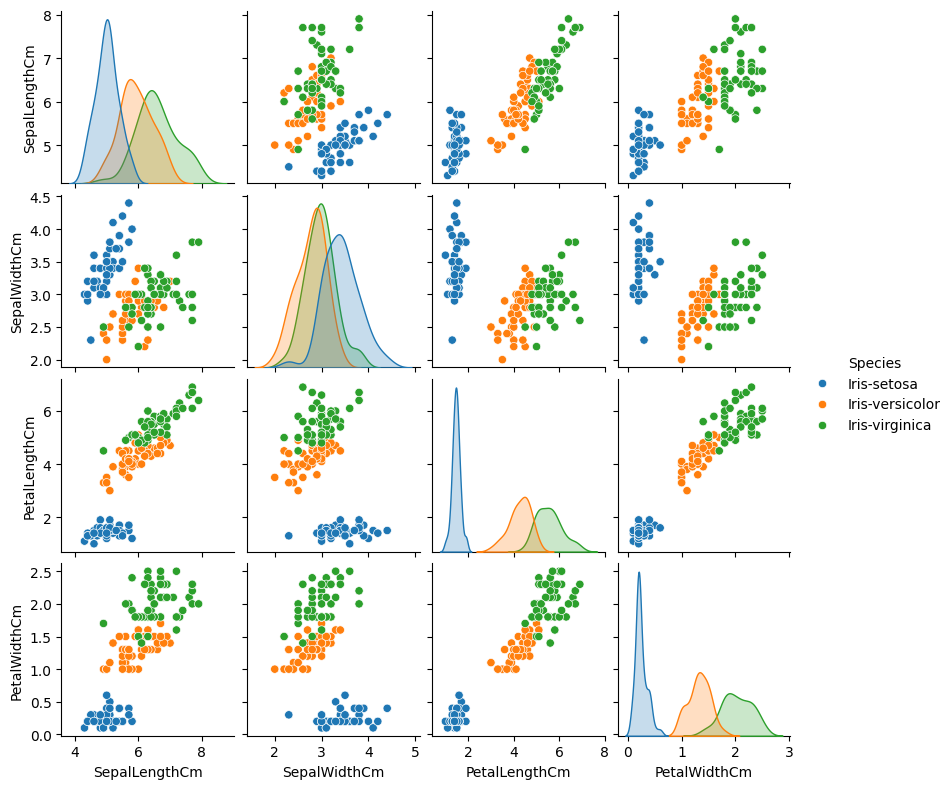

In [30]:
#Correlation

sns.pairplot(data=iris_dataset, hue='Species', height=2)

In [32]:
# Exclude non-numeric columns from correlation computation
numeric_columns = iris_dataset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)


               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


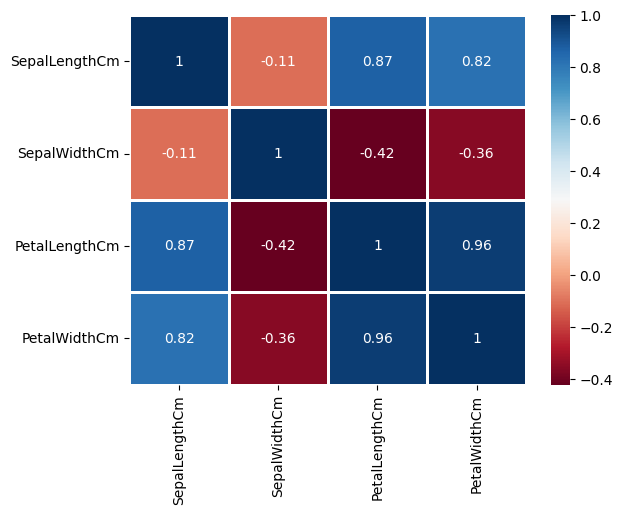

In [36]:
sns.heatmap(numeric_columns.corr(), annot=True, cmap='RdBu', linewidths=2)
plt.show()


<Figure size 1500x1500 with 0 Axes>

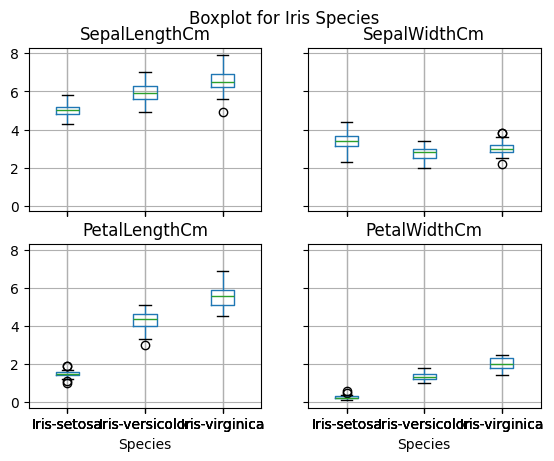

In [41]:
plt.figure(figsize=(15, 15))
iris_dataset.boxplot(column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], by="Species")
plt.suptitle('Boxplot for Iris Species')
plt.show()

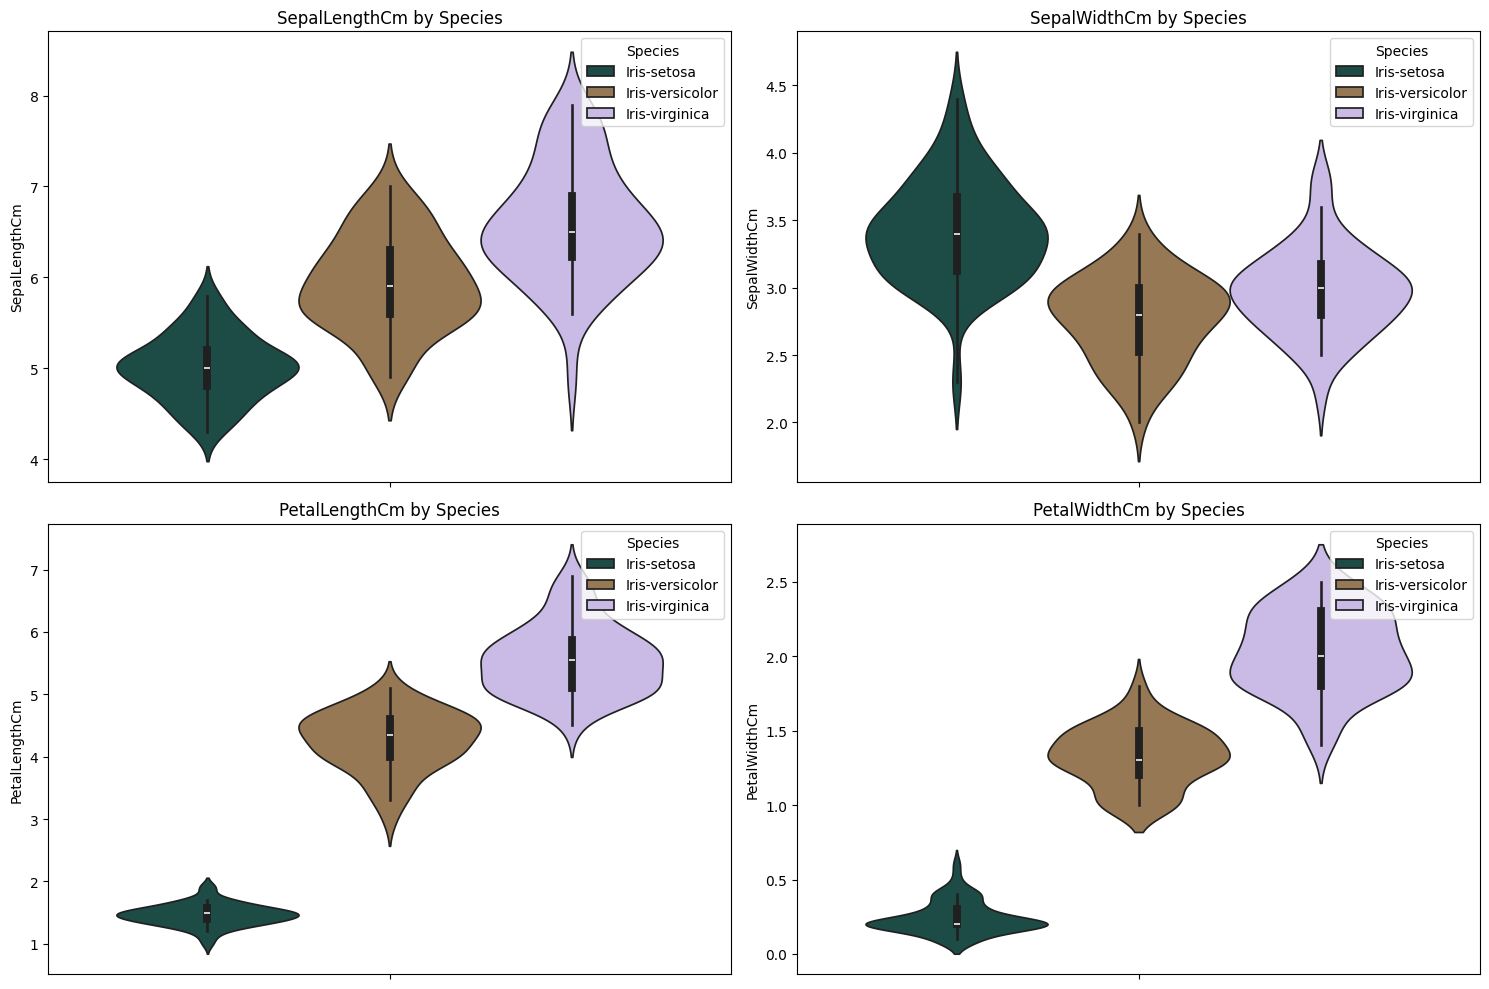

In [66]:
#colors = {'Iris-setosa': 'skyblue', 'Iris-versicolor': 'salmon', 'Iris-virginica': 'lightgreen'}
colors = sns.color_palette("cubehelix", n_colors=3)
# Create violinplots for each numerical column with specified colors
plt.figure(figsize=(15, 10))
for i, column in enumerate(iris_dataset.select_dtypes(include=['float64', 'int64'])):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=iris_dataset, hue='Species', y=column, palette=colors)
    plt.title(f'{column} by Species')

plt.tight_layout()
plt.show()

In [73]:
# Train - Test Split

X = iris_dataset.iloc[:,0:4].values 
y = iris_dataset.iloc[:,4:].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')


Total # of sample in whole dataset: 150
Total # of sample in train dataset: 100
Total # of sample in validation dataset: 25
Total # of sample in test dataset: 25


In [80]:


# Reshape y to a 1-dimensional array
y_train = y_train.ravel()
y_valid = y_valid.ravel()
y_test = y_test.ravel()

# LogisticRegression
trainScores = []
validationScores = []
testScores = []

# Increase max_iter parameter to ensure convergence
model = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000 or more
model.fit(X_train, y_train)
score = model.score(X_valid, y_valid)
print(f'{model}') 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')
trainScores.append(train_score*100)

validation_score = model.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score*100}')
validationScores.append(validation_score*100)

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')
testScores.append(test_score*100)
print(" ")
    
y_predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_predictions, y_test)

print(f'Confusion Matrix: \n{conf_matrix}\n')

predictions = model.predict(X_test)
cm = confusion_matrix(predictions, y_test)

tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp)
print(f'Accuracy : {accuracy}')
print(f'Precision: {precision}')
print(f'Recall   : {recall}')
print(f'F1 score : {f1score}')
print(f'Specificity : {specificity}')
print("") 
print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
print("")


preds = model.predict(X_test)
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
print("############################################################################")
print("")


LogisticRegression(max_iter=1000)
Train score of trained model: 98.0
Validation score of trained model: 96.0
Test score of trained model: 100.0
 
Confusion Matrix: 
[[ 5  0  0]
 [ 0 11  0]
 [ 0  0  9]]

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 score : 1.0
Specificity : 1.0

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        25
      macro avg       1.00      1.00      1.00        25
   weighted avg       1.00      1.00      1.00        25



############################################################################



In [82]:


# Reshape y to a 1-dimensional array
y_train = y_train.ravel()
y_valid = y_valid.ravel()
y_test = y_test.ravel()

# LogisticRegression
trainScores = []
validationScores = []
testScores = []

# Increase max_iter parameter to ensure convergence
model = DecisionTreeClassifier()  # Increase max_iter to 1000 or more
model.fit(X_train, y_train)
score = model.score(X_valid, y_valid)
print(f'{model}') 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')
trainScores.append(train_score*100)

validation_score = model.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score*100}')
validationScores.append(validation_score*100)

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')
testScores.append(test_score*100)
print(" ")
    
y_predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_predictions, y_test)

print(f'Confusion Matrix: \n{conf_matrix}\n')

predictions = model.predict(X_test)
cm = confusion_matrix(predictions, y_test)

tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp)
print(f'Accuracy : {accuracy}')
print(f'Precision: {precision}')
print(f'Recall   : {recall}')
print(f'F1 score : {f1score}')
print(f'Specificity : {specificity}')
print("") 
print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
print("")


preds = model.predict(X_test)
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
print("############################################################################")
print("")


DecisionTreeClassifier()
Train score of trained model: 100.0
Validation score of trained model: 96.0
Test score of trained model: 96.0
 
Confusion Matrix: 
[[ 5  0  0]
 [ 0 11  1]
 [ 0  0  8]]

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 score : 1.0
Specificity : 1.0

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.96        25
      macro avg       0.96      0.97      0.97        25
   weighted avg       0.96      0.96      0.96        25



############################################################################



In [86]:



# Reshape y to a 1-dimensional array
y_train = y_train.ravel()
y_valid = y_valid.ravel()
y_test = y_test.ravel()


trainScores = []
validationScores = []
testScores = []

# Increase max_iter parameter to ensure convergence
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1, max_iter=1000)
model.fit(X_train, y_train)
score = model.score(X_valid, y_valid)
print(f'{model}') 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')
trainScores.append(train_score*100)

validation_score = model.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score*100}')
validationScores.append(validation_score*100)

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')
testScores.append(test_score*100)
print(" ")
    
y_predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_predictions, y_test)

print(f'Confusion Matrix: \n{conf_matrix}\n')

predictions = model.predict(X_test)
cm = confusion_matrix(predictions, y_test)

tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp)
print(f'Accuracy : {accuracy}')
print(f'Precision: {precision}')
print(f'Recall   : {recall}')
print(f'F1 score : {f1score}')
print(f'Specificity : {specificity}')
print("") 
print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
print("")


preds = model.predict(X_test)
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
print("############################################################################")
print("")


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5000, 10), max_iter=1000,
              random_state=1, solver='lbfgs')
Train score of trained model: 98.0
Validation score of trained model: 96.0
Test score of trained model: 96.0
 
Confusion Matrix: 
[[ 5  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 score : 1.0
Specificity : 1.0

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.96        25
      macro avg       0.97      0.97      0.97        25
   weighted avg       0.96      0.96      0.96        25



############################################################################

